In [1]:
start_time = 0;
end_time = 100;

# How much time passes between each successive calculation
time_step = 1/4 # In years
end_step = int(((end_time - start_time)/ time_step));

# The number of zebras when the simulation is started
initial_zebras = 30000;

# The number of lions when the simulation is started
initial_lions = 15;

# The number of zebras that must be killed for a lion to be born. (Zebras / Lion)

zebras_per_lion = 1000;

# The chance a zebra will die when a zebra lion cross paths
fighting_chance = 0.50;

meeting_chance = 0.02;

zebra_growth_rate = 0.20;

lion_death_rate = 0.10;

# Initialization

zebras_over_time = fill(0.0, end_step+1);
lions_over_time = fill(0.0, end_step+1);
model_time = fill(0.0, end_step+1);

zebras = initial_zebras;
lions = initial_lions;

zebras_over_time[1]	= zebras;
lions_over_time[1] = lions;

In [2]:

# Run the model

for sim_step = 1:end_step

	sim_time = start_time + sim_step * time_step;
	model_time[sim_step] = sim_time;

	# First we must calculate our flows (our rates)
	zebra_births = zebras * zebra_growth_rate;
	zebra_deaths  = min(zebras, meeting_chance*fighting_chance*zebras*lions);

	lion_births = 1/zebras_per_lion * zebra_deaths;
	lion_deaths = lions * lion_death_rate;

	# Update the stock levels
	zebras = zebras + zebra_births - zebra_deaths;
	lions = lions + lion_births - lion_deaths

	# Stock values always update in the next time step
	zebras_over_time[sim_step+1] = zebras;
	lions_over_time[sim_step+1] = lions;
end

In [16]:
using Gadfly
using DataFrames

In [40]:
d = DataFrame(ID = 1:size(d, 1), T = model_time, L=lions_over_time, Z=zebras_over_time);
[head(d),tail(d)]

,ID,T,L,Z
1,1,0.25,15.0,30000.0
2,2,0.5,18.0,31500.0
3,3,0.75,21.87,32130.0
4,4,1.0,26.709831,31529.169
5,5,1.25,32.46023565560439,29413.61504439561
6,6,1.5,38.761940848287075,25748.60929503161
7,396,99.0,0.02085828792995039,1.7362620572629801e-6
8,397,99.25,0.018772459137317506,2.0831523141764537e-6
9,398,99.5,0.016895213223976815,2.4993917180947974e-6
10,399,99.75,0.015205691902001411,2.9988477841536824e-6


In [53]:
d[:ZN] = d[:Z]/1000
d 

,ID,T,L,Z,ZN
1,1,0.25,15.0,30000.0,30.0
2,2,0.5,18.0,31500.0,31.5
3,3,0.75,21.87,32130.0,32.13
4,4,1.0,26.709831,31529.169,31.529169000000003
5,5,1.25,32.46023565560439,29413.61504439561,29.41361504439561
6,6,1.5,38.761940848287075,25748.60929503161,25.74860929503161
7,7,1.75,44.866407467655065,20917.67044984123,20.91767044984123
8,8,2.0,49.764773977656596,15716.197283042431,15.716197283042431
9,9,2.25,52.60942663567961,11038.306683862247,11.038306683862247
10,10,2.5,53.15567382877948,7438.778163966869,7.4387781639668695


In [54]:
ds = stack(d, [:ZN, :L], [:ID, :T]);
[head(ds),tail(ds)]

,variable,value,ID,T
1,ZN,30.0,1,0.25
2,ZN,31.5,2,0.5
3,ZN,32.13,3,0.75
4,ZN,31.529169000000003,4,1.0
5,ZN,29.41361504439561,5,1.25
6,ZN,25.74860929503161,6,1.5
7,L,0.02085828792995039,396,99.0
8,L,0.018772459137317506,397,99.25
9,L,0.016895213223976815,398,99.5
10,L,0.015205691902001411,399,99.75


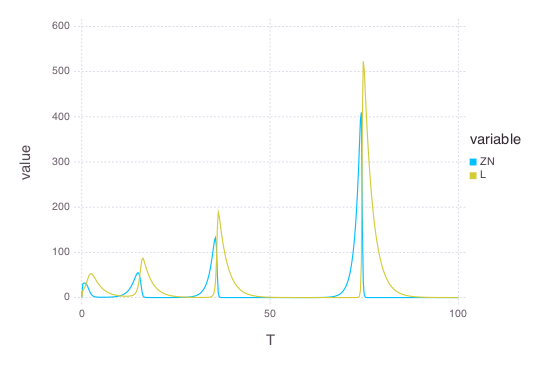

In [55]:
plot(ds, x = :T, y = :value, color =:variable, Geom.line )